In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
print(os.listdir("../input"))

['metro-bike-share-trip-data.csv', 'socrata_metadata.json']


In [27]:
df = pd.read_csv('../input/metro-bike-share-trip-data.csv')
df.columns

Index(['Trip ID', 'Duration', 'Start Time', 'End Time', 'Starting Station ID',
       'Starting Station Latitude', 'Starting Station Longitude',
       'Ending Station ID', 'Ending Station Latitude',
       'Ending Station Longitude', 'Bike ID', 'Plan Duration',
       'Trip Route Category', 'Passholder Type', 'Starting Lat-Long',
       'Ending Lat-Long', 'Neighborhood Councils (Certified)',
       'Council Districts', 'Zip Codes', 'LA Specific Plans',
       'Precinct Boundaries', 'Census Tracts'],
      dtype='object')

In [3]:
df.head()
#Most of the columns after 'Passholder Type' appear null. Let's check the end part of data.

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Trip Route Category,Passholder Type,Starting Lat-Long,Ending Lat-Long,Neighborhood Councils (Certified),Council Districts,Zip Codes,LA Specific Plans,Precinct Boundaries,Census Tracts
0,18222186,15060,2017-01-19T17:05:00.000,2017-01-19T21:16:00.000,3031.0,34.044701,-118.252441,3000.0,NaN,NaN,5944.0,0.0,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9518671,77160,2016-10-09T14:37:00.000,2016-10-10T12:03:00.000,NaN,NaN,NaN,3000.0,NaN,NaN,6603.0,30.0,One Way,Monthly Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20444932,86400,2017-02-18T10:15:00.000,2017-02-20T15:20:00.000,3026.0,34.063179,-118.245880,3000.0,NaN,NaN,5879.0,0.0,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20905031,18840,2017-02-27T12:26:00.000,2017-02-27T17:40:00.000,3023.0,34.050911,-118.240967,3000.0,NaN,NaN,6056.0,0.0,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21031476,86400,2017-02-27T20:26:00.000,2017-03-01T09:49:00.000,3008.0,34.046612,-118.262733,3000.0,NaN,NaN,6054.0,365.0,One Way,Flex Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.tail()
#There are infact some values in these columns which appear null in first peek.

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Trip Route Category,Passholder Type,Starting Lat-Long,Ending Lat-Long,Neighborhood Councils (Certified),Council Districts,Zip Codes,LA Specific Plans,Precinct Boundaries,Census Tracts
132422,4907293,2520,2016-08-06T14:35:00.000,2016-08-06T15:17:00.000,3052.0,34.051102,-118.26456,3052.0,34.051102,-118.26456,6316.0,0.0,Round Trip,Walk-up,"{'longitude': '-118.26456', 'latitude': '34.05...","{'longitude': '-118.26456', 'latitude': '34.05...",76.0,11.0,23078.0,54.0,847.0,567.0
132423,4908300,1080,2016-08-08T07:18:00.000,2016-08-08T07:36:00.000,3027.0,34.049980,-118.24716,3057.0,34.035679,-118.27081,6541.0,30.0,One Way,Monthly Pass,"{'longitude': '-118.24716', 'latitude': '34.04...","{'longitude': '-118.27081', 'latitude': '34.03...",76.0,9.0,23074.0,7.0,660.0,694.0
132424,4726795,1500,2016-07-30T15:52:00.000,2016-07-30T16:17:00.000,3014.0,34.056610,-118.23721,3020.0,34.031052,-118.26709,6417.0,30.0,One Way,Monthly Pass,"{'longitude': '-118.23721', 'latitude': '34.05...","{'longitude': '-118.26709', 'latitude': '34.03...",28.0,9.0,22728.0,7.0,660.0,694.0
132425,5034026,780,2016-08-12T09:17:00.000,2016-08-12T09:30:00.000,3036.0,34.039188,-118.23253,3055.0,34.044159,-118.25158,6369.0,365.0,One Way,Flex Pass,"{'longitude': '-118.23253', 'latitude': '34.03...","{'longitude': '-118.25158', 'latitude': '34.04...",28.0,9.0,23074.0,NaN,527.0,542.0
132426,5250466,300,2016-09-06T18:16:00.000,2016-09-06T18:21:00.000,3046.0,34.053021,-118.24795,3049.0,34.056969,-118.25359,5874.0,30.0,One Way,Monthly Pass,"{'longitude': '-118.24795', 'latitude': '34.05...","{'longitude': '-118.25359', 'latitude': '34.05...",76.0,9.0,22728.0,37.0,1262.0,544.0


In [5]:
df.isnull().sum()

Trip ID                                   0
Duration                                  0
Start Time                                0
End Time                                  0
Starting Station ID                      19
Starting Station Latitude                48
Starting Station Longitude               48
Ending Station ID                        96
Ending Station Latitude                1051
Ending Station Longitude               1051
Bike ID                                  10
Plan Duration                           766
Trip Route Category                       0
Passholder Type                           0
Starting Lat-Long                     33805
Ending Lat-Long                        1051
Neighborhood Councils (Certified)     33837
Council Districts                     33837
Zip Codes                             33837
LA Specific Plans                    116590
Precinct Boundaries                    1099
Census Tracts                          1099
dtype: int64

In [6]:
df['Plan Duration'].unique()
#Let's check corresponding which PassholderType is the value nan.

array([  0.,  30., 365.,  nan])

In [28]:
df[df['Plan Duration'].isnull()]['Passholder Type']
#Here we can easily fill the nan values in 'Plan Duration' using the Passholder Type
#Staff Annual: 365 days
#Monthly Pass: 30 days
for index in df[df['Plan Duration'].isnull()].index:
    if df.loc[index, 'Passholder Type']=='Staff Annual':
        df.loc[index, 'Plan Duration']=365
    elif df.loc[index, 'Passholder Type']=='Monthly Pass':
        df.loc[index, 'Plan Duration']=30

In [8]:
df[df['Plan Duration'].isnull()]
#The null values have been filled up.

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Trip Route Category,Passholder Type,Starting Lat-Long,Ending Lat-Long,Neighborhood Councils (Certified),Council Districts,Zip Codes,LA Specific Plans,Precinct Boundaries,Census Tracts


In [9]:
df['Starting Station Latitude'].index == df['Starting Station Longitude'].index
df['Ending Station Latitude'].index == df['Ending Station Longitude'].index
#values of latitude and longitude are missing in the same rows.

array([ True,  True,  True, ...,  True,  True,  True])

In [29]:
#I will drop the columns which I don't need for now.
df = df.drop(['Starting Lat-Long', 'Ending Lat-Long', 'Neighborhood Councils (Certified)', 
              'Council Districts', 'Zip Codes', 'LA Specific Plans', 'Precinct Boundaries', 
              'Census Tracts', 'Bike ID', 'Plan Duration', 'Trip ID'], axis=1)

In [30]:
#Given the number of rows is big we can afford to remove those rows which contain null values.
df = df.dropna()

In [12]:
df.isnull().sum()

Trip ID                       0
Duration                      0
Start Time                    0
End Time                      0
Starting Station ID           0
Starting Station Latitude     0
Starting Station Longitude    0
Ending Station ID             0
Ending Station Latitude       0
Ending Station Longitude      0
Bike ID                       0
Plan Duration                 0
Trip Route Category           0
Passholder Type               0
dtype: int64

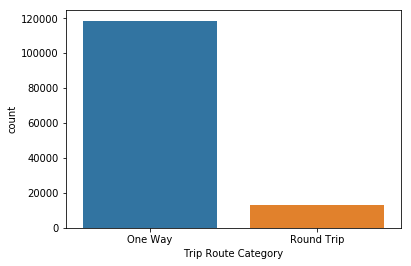

In [31]:
def count_plot(value):
    sns.countplot(x=value, data=df)

count_plot('Trip Route Category')

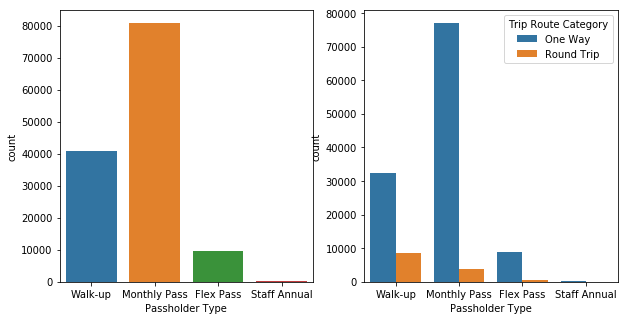

In [32]:
#Monthly pass is the most popular choice
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
count_plot('Passholder Type')
plt.subplot(1, 2, 2)
sns.countplot(x='Passholder Type', data=df, hue='Trip Route Category')

In [33]:
df['Start Time'] = pd.to_datetime(df['Start Time'])
df['End Time'] = pd.to_datetime(df['End Time'])

In [53]:
sdf = df.groupby('Starting Station ID').agg('max')
len(df['Trip ID'].unique())

130923

,Trip ID,Duration,Start Time,End Time,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Trip Route Category,Passholder Type
Starting Station ID,,,,,,,,,,,
3005.0,23648060,1.428898e-13,2017-03-31 20:16:00,2017-03-31 20:21:00,34.048550,-118.259048,4108.0,34.064281,-118.231277,Round Trip,Walk-up
3006.0,23656661,1.428898e-13,2017-03-31 22:04:00,2017-03-31 22:07:00,34.045540,-118.256668,4108.0,34.064281,0.000000,Round Trip,Walk-up
3007.0,23643817,1.428898e-13,2017-03-31 18:46:00,2017-03-31 19:00:00,34.050480,-118.254590,4108.0,34.064281,-118.231277,Round Trip,Walk-up
3008.0,23656659,1.428898e-13,2017-03-31 22:05:00,2017-03-31 22:10:00,34.046612,-118.262730,3082.0,34.064281,-118.231277,Round Trip,Walk-up
3009.0,23190667,2.728798e-14,2017-03-26 15:31:00,2017-03-26 16:10:00,33.987381,-118.472832,3039.0,34.024479,-118.393867,Round Trip,Walk-up
3010.0,23639630,1.428898e-13,2017-03-31 17:53:00,2017-03-31 18:44:00,34.037048,-118.254868,4108.0,34.056610,-118.231277,Round Trip,Walk-up
3011.0,23635417,1.428898e-13,2017-03-31 17:38:00,2017-03-31 17:52:00,34.041130,-118.267980,4108.0,34.064281,0.000000,Round Trip,Walk-up
3014.0,23664959,1.428898e-13,2017-03-31 22:27:00,2017-04-01 00:04:00,34.056610,-118.237210,3082.0,34.064281,-118.231277,Round Trip,Walk-up
3016.0,23643796,1.428898e-13,2017-03-31 19:16:00,2017-03-31 19:22:00,34.052898,-118.241560,3082.0,34.064281,-118.231277,Round Trip,Walk-up
